In [2]:
import pandas as pd
print(pd.__version__)

2.0.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [4]:
# Read in data
df = pd.read_excel('D:/Data_Sets/Reviews/reviews_all.xlsx')
print(df.shape)
df = df.head(500)
print(df.shape)

(249, 10)
(249, 10)


In [5]:
df.head()

,Id,Platform,Course_Name,Level,Duration_hours,Students_Enrolled,Student_Name,Reviews,Student_Rating,Overall_Rating
0,1,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Ekta R.,Its a good course to learn about the mentioned...,5,"4,4"
1,2,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Jakub B.,Good exercises but sometimes was a bug in answ...,5,"4,4"
2,3,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Natalia S.,Clear and concise. Very good instructor.,5,"4,4"
3,4,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Susan S.,This course was very clear and had good examples,5,"4,4"
4,5,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Enoch B.,"Datacamp, has a great learning format that all...",5,"4,4"


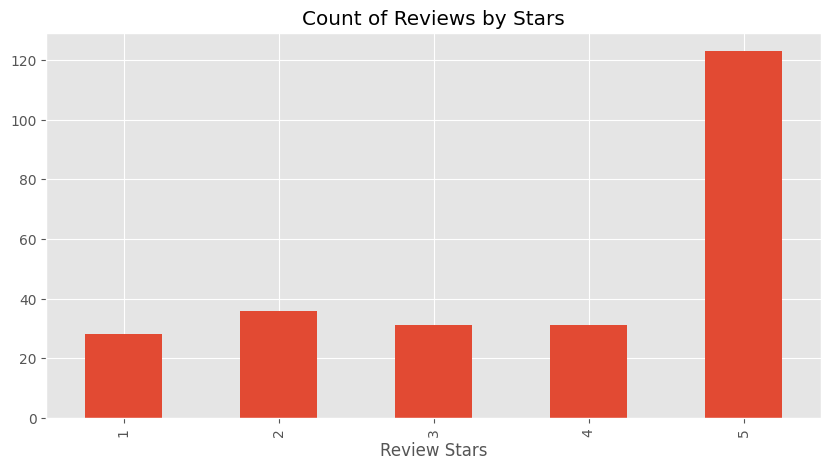

In [6]:
ax = df['Student_Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
example = df['Reviews'][50]
print(example)

well structured, very useful course on nested queries


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Valcov
[nltk_data]     Bianca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['well',
 'structured',
 ',',
 'very',
 'useful',
 'course',
 'on',
 'nested',
 'queries']

In [10]:
tagged = nltk.pos_tag(tokens)
tagged[:10]


[('well', 'RB'),
 ('structured', 'VBN'),
 (',', ','),
 ('very', 'RB'),
 ('useful', 'JJ'),
 ('course', 'NN'),
 ('on', 'IN'),
 ('nested', 'JJ'),
 ('queries', 'NNS')]

In [11]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Valcov Bianca\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Valcov
[nltk_data]     Bianca\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [13]:
nltk.download('words')

[nltk_data] Downloading package words to C:\Users\Valcov
[nltk_data]     Bianca\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  well/RB
  structured/VBN
  ,/,
  very/RB
  useful/JJ
  course/NN
  on/IN
  nested/JJ
  queries/NNS)


Step 1. VADER Seniment Scoring
We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

This uses a "bag of words" approach:
Stop words are removed
each word is scored and combined to a total score.

In [15]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Valcov
[nltk_data]     Bianca\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Valcov
[nltk_data]     Bianca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Valcov
[nltk_data]     Bianca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
print(example)
sia.polarity_scores(example)

well structured, very useful course on nested queries


{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6478}

In [19]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Reviews']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/249 [00:00<?, ?it/s]

In [20]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,Platform,Course_Name,Level,Duration_hours,Students_Enrolled,Student_Name,Reviews,Student_Rating,Overall_Rating
0,1,0.000,0.734,0.266,0.4404,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Ekta R.,Its a good course to learn about the mentioned...,5,"4,4"
1,2,0.130,0.602,0.269,0.4588,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Jakub B.,Good exercises but sometimes was a bug in answ...,5,"4,4"
2,3,0.000,0.408,0.592,0.6997,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Natalia S.,Clear and concise. Very good instructor.,5,"4,4"
3,4,0.000,0.547,0.453,0.6997,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Susan S.,This course was very clear and had good examples,5,"4,4"
4,5,0.052,0.824,0.124,0.8111,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Enoch B.,"Datacamp, has a great learning format that all...",5,"4,4"


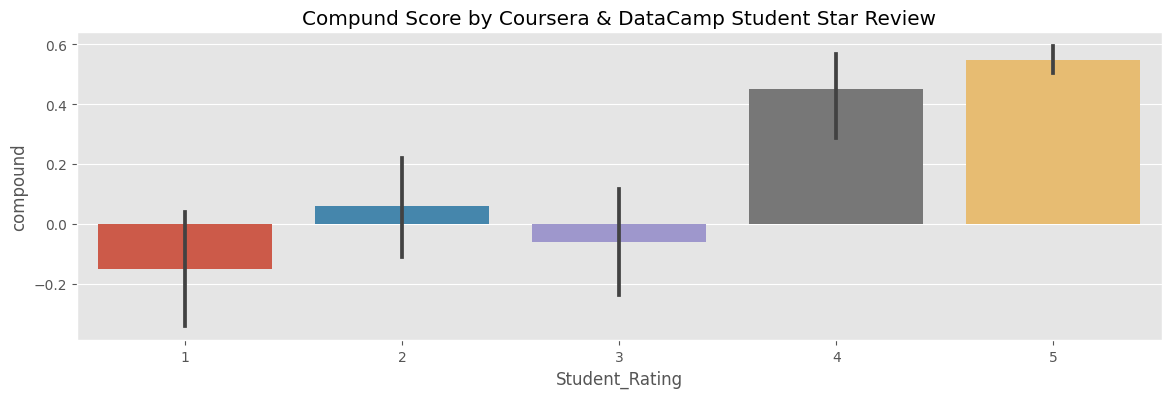

In [21]:
fig, axs = plt.subplots(figsize=(14, 4))
ax = sns.barplot(data=vaders, x='Student_Rating', y='compound')
ax.set_title('Compund Score by Coursera & DataCamp Student Star Review')
plt.show()

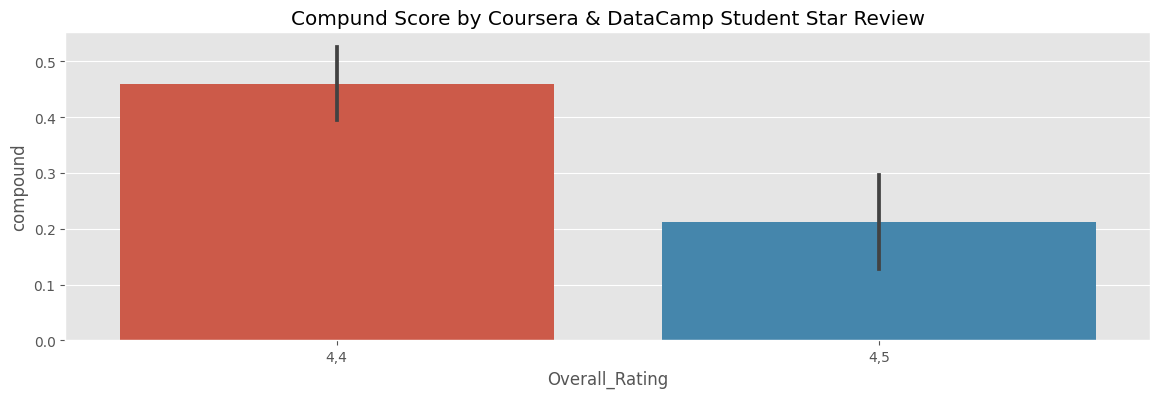

In [22]:
fig, axs = plt.subplots(figsize=(14, 4))
ax = sns.barplot(data=vaders, x='Overall_Rating', y='compound')
ax.set_title('Compund Score by Coursera & DataCamp Student Star Review')
plt.show()

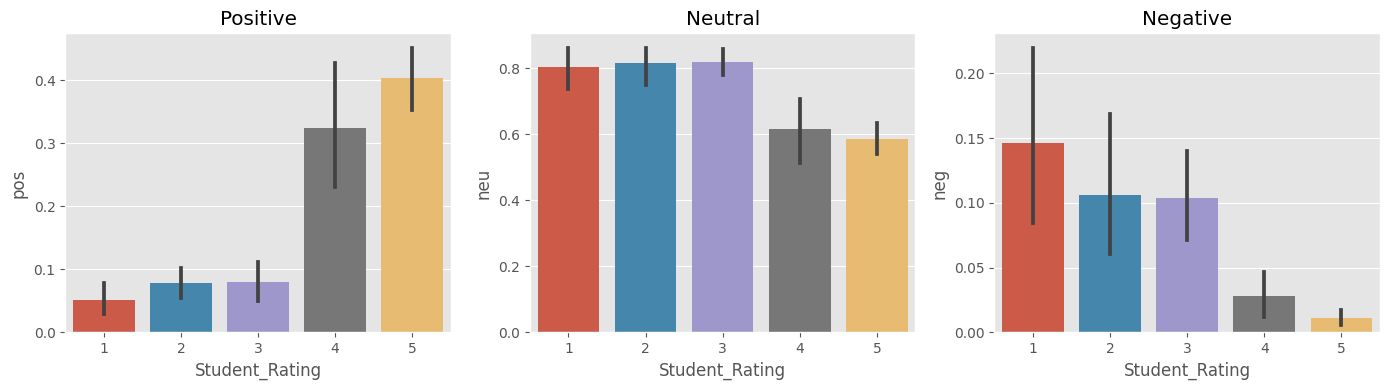

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
sns.barplot(data=vaders, x='Student_Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Student_Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Student_Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [26]:
# VADER results on example
print(example)
sia.polarity_scores(example)

well structured, very useful course on nested queries


{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6478}

In [27]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.004387103, 'roberta_neu': 0.10291991, 'roberta_pos': 0.89269304}


In [28]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [29]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Reviews']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/249 [00:00<?, ?it/s]

In [30]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [31]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Platform', 'Course_Name',
       'Level', 'Duration_hours', 'Students_Enrolled', 'Student_Name',
       'Reviews', 'Student_Rating', 'Overall_Rating'],
      dtype='object')

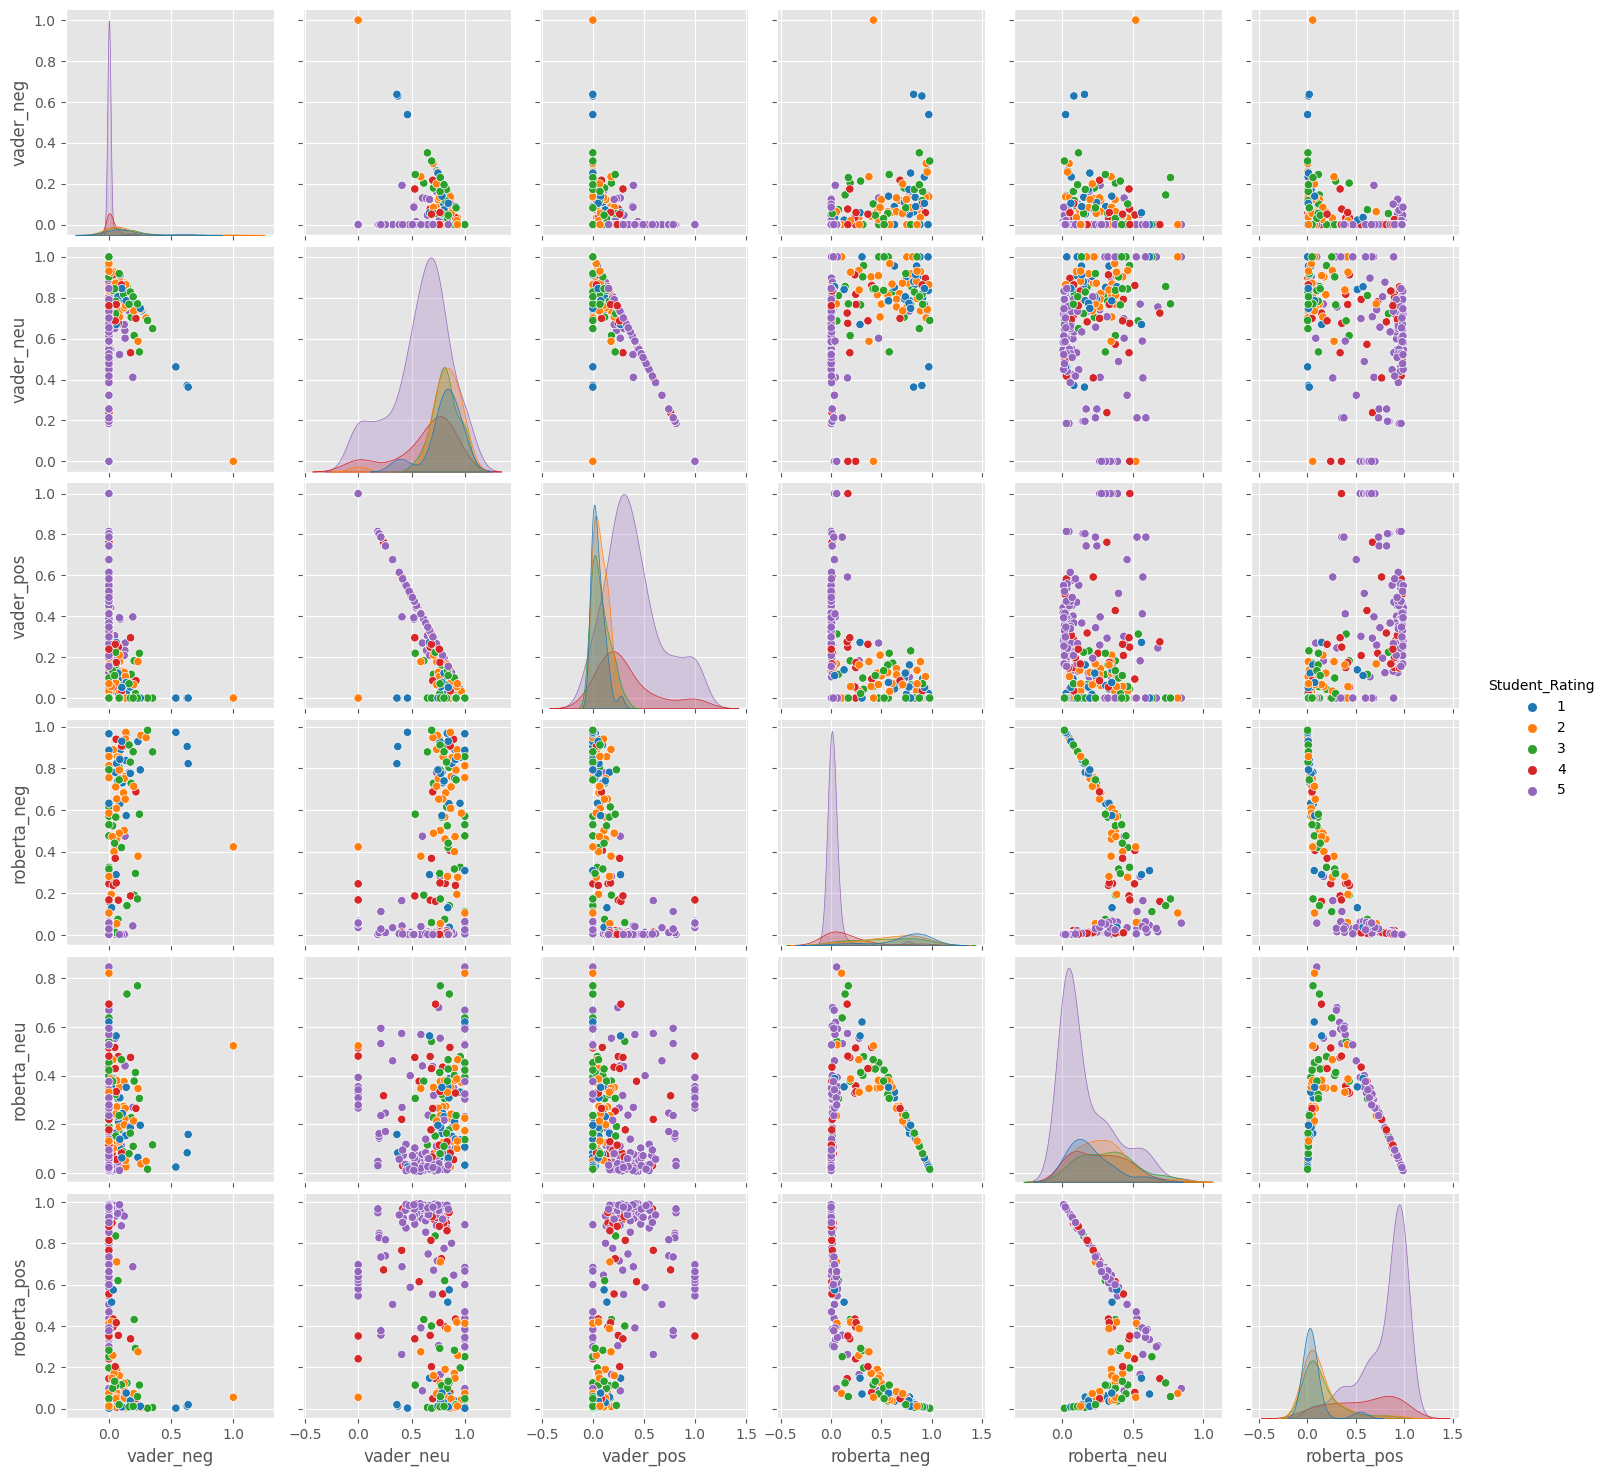

In [32]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Student_Rating',
            palette='tab10')
plt.show()

In [33]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Platform,Course_Name,Level,Duration_hours,Students_Enrolled,Student_Name,Reviews,Student_Rating,Overall_Rating
0,1,0.000,0.734,0.266,0.4404,0.002343,0.042444,0.955212,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Ekta R.,Its a good course to learn about the mentioned...,5,"4,4"
1,2,0.130,0.602,0.269,0.4588,0.473575,0.439946,0.086478,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Jakub B.,Good exercises but sometimes was a bug in answ...,5,"4,4"
2,3,0.000,0.408,0.592,0.6997,0.005317,0.063456,0.931227,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Natalia S.,Clear and concise. Very good instructor.,5,"4,4"
3,4,0.000,0.547,0.453,0.6997,0.003412,0.070925,0.925663,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Susan S.,This course was very clear and had good examples,5,"4,4"
4,5,0.052,0.824,0.124,0.8111,0.008184,0.059679,0.932137,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Enoch B.,"Datacamp, has a great learning format that all...",5,"4,4"


Positive 1-Star and Negative 5-Star Reviews

In [34]:
results_df.query('Student_Rating == 1') \
    .sort_values('roberta_pos', ascending=False)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Platform,Course_Name,Level,Duration_hours,Students_Enrolled,Student_Name,Reviews,Student_Rating,Overall_Rating
119,120,0.035,0.854,0.110,0.5888,0.037131,0.388151,0.574718,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Elian A,The course was shallow in content. I wish it e...,1,"4,5"
117,118,0.022,0.840,0.138,0.9489,0.130720,0.353906,0.515374,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By David A,"While I enjoyed the content of this course, I ...",1,"4,5"
108,109,0.058,0.669,0.272,0.7475,0.289302,0.563113,0.147585,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By k b,Kindly revise the course content and match it ...,1,"4,5"
221,222,0.139,0.785,0.076,-0.3400,0.572480,0.352073,0.075447,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Lisa K,The course was good until the last 2 weeks whe...,1,"4,5"
130,131,0.000,1.000,0.000,0.0000,0.308796,0.620355,0.070848,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Eduard C,One should take another course on coursera to ...,1,"4,5"
101,102,0.088,0.851,0.061,-0.4215,0.629777,0.309057,0.061165,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Nils W,It is a strange course and the worst in this s...,1,"4,5"
128,129,0.051,0.786,0.162,0.9305,0.780208,0.163556,0.056236,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Reinaldo O,"If I could give this course zero star, I would...",1,"4,5"
195,196,0.172,0.773,0.054,-0.6542,0.775123,0.186801,0.038076,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Shalini D r,i can write reviews for the coursers. The webs...,1,"4,5"
115,116,0.077,0.904,0.019,-0.7927,0.751010,0.211053,0.037937,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Yiannis E,"This was not a course. This was a ""go get them...",1,"4,5"
106,107,0.000,0.955,0.045,0.4588,0.631789,0.332342,0.035870,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Thomas S,I felt that the curriculum was not structured ...,1,"4,5"


In [35]:
results_df.query('Student_Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Reviews'].values[1]

"While I enjoyed the content of this course, I feel that the instruction was disorganized.  This course is part of a beginner sequence in data science, but the teacher assumes certain advanced skills are already known and does not teach them.  For example, chart annotation is only briefly covered in the second lab, but the final assignment requires a depth of knowledge not taught in this course.  If that's the case then chart annotation should be taught as its own section.  A lot of the quizzes are written to trick you with ambiguous phrases, rarely do they actually test what is learned in the labs.  I think the teaching in the other IBM data science courses is far better than this one, hopefully they improve this one.  "

In [36]:
results_df.query('Student_Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Reviews'].values[2]

'Kindly revise the course content and match it with the final project. And definitely re-record videos without annoying voice of the instructor and repetitive sentences about the data. '

In [37]:
results_df.query('Student_Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Reviews'].values[0]

'Kindly revise the course content and match it with the final project. And definitely re-record videos without annoying voice of the instructor and repetitive sentences about the data. '

In [38]:
results_df.query('Student_Rating == 5') \
    .sort_values('roberta_neg', ascending=False)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Platform,Course_Name,Level,Duration_hours,Students_Enrolled,Student_Name,Reviews,Student_Rating,Overall_Rating
48,49,0.162,0.735,0.103,-0.1513,0.779250,0.191935,0.028815,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,khai t.,It would be nice if we can stop with the footb...,5,"4,4"
58,59,0.000,1.000,0.000,0.0000,0.754420,0.231736,0.013845,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Vuyo M.,Filled alot of gaps in my understanding.,5,"4,4"
1,2,0.130,0.602,0.269,0.4588,0.473575,0.439946,0.086478,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Jakub B.,Good exercises but sometimes was a bug in answ...,5,"4,4"
38,39,0.050,0.769,0.182,0.7384,0.280587,0.553634,0.165779,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Jean F.,And the exercices are fun to do I suggest not ...,5,"4,4"
23,24,0.000,0.000,1.000,0.5719,0.168246,0.480159,0.351595,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Piotr S.,Excellent,5,"4,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,162,0.000,0.582,0.418,0.9366,0.001318,0.007403,0.991279,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Joel E,It's been one of the best courses I've done so...,5,"4,5"
168,169,0.000,0.730,0.270,0.5719,0.001248,0.061106,0.937646,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By Jayanthi P,Structured in an excellent brief manner with p...,5,"4,5"
15,16,0.000,0.736,0.264,0.8856,0.001233,0.009423,0.989344,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Benson M.,The course was great. It blends in very nicely...,5,"4,4"
133,134,0.000,0.792,0.208,0.8476,0.001123,0.015903,0.982974,Coursera,Data Visualization with Python,Intermediate,17,207732.000,By LEOPOLDO S,The course with the IBM Lab is a very good way...,5,"4,5"


In [39]:
# nevative sentiment on 5-Star review
results_df.query('Student_Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Reviews'].values[0]

"It would be nice if we can stop with the football examples. it's just very confusing for someone who does not follow football."

In [40]:
results_df.query('Student_Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Reviews'].values[0]

'Good presentation, hard enough examples'

The Transformers Pipeline (sentiment predictions)

In [41]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.11.4 (you have 3.11.3)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


In [42]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [43]:
sent_pipeline('Online learning makes me happy!')

[{'label': 'POSITIVE', 'score': 0.9998836517333984}]

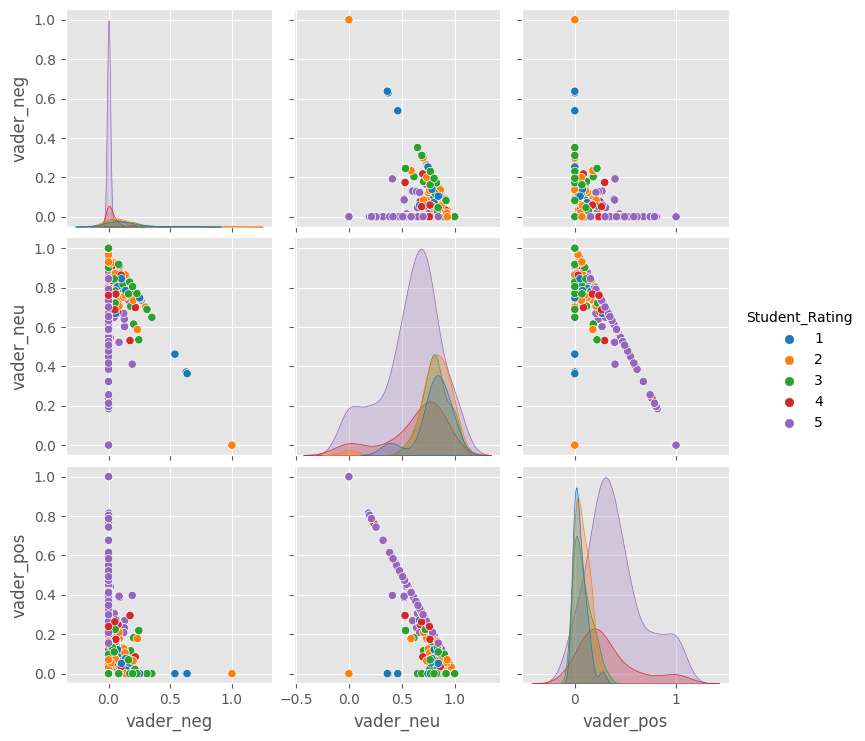

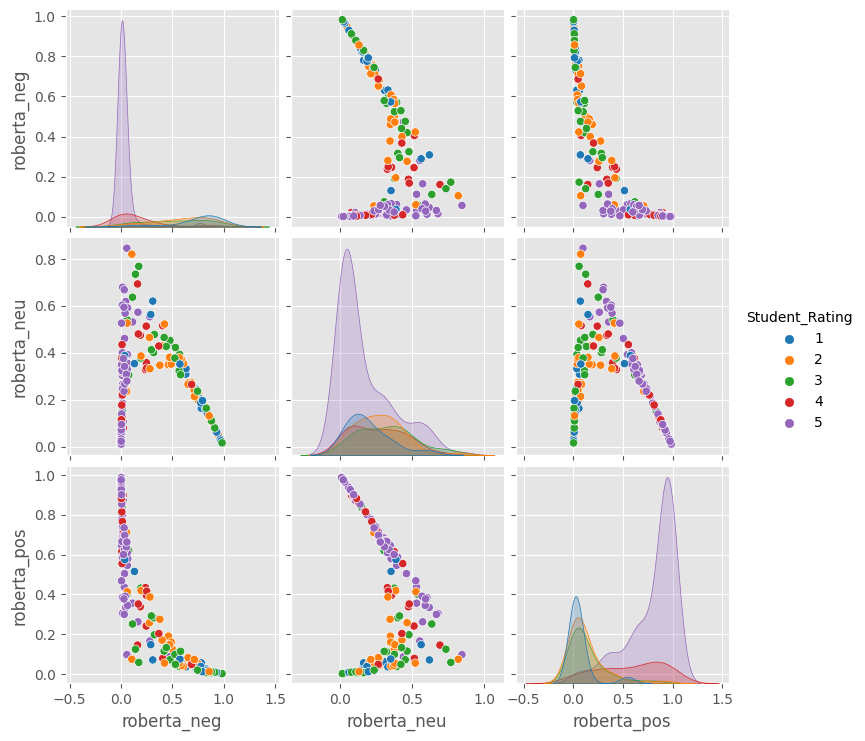

In [44]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos'],
            hue='Student_Rating',
            palette='tab10')
sns.pairplot(data=results_df,
             vars=['roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Student_Rating',
            palette='tab10')
plt.show()
plt.show()

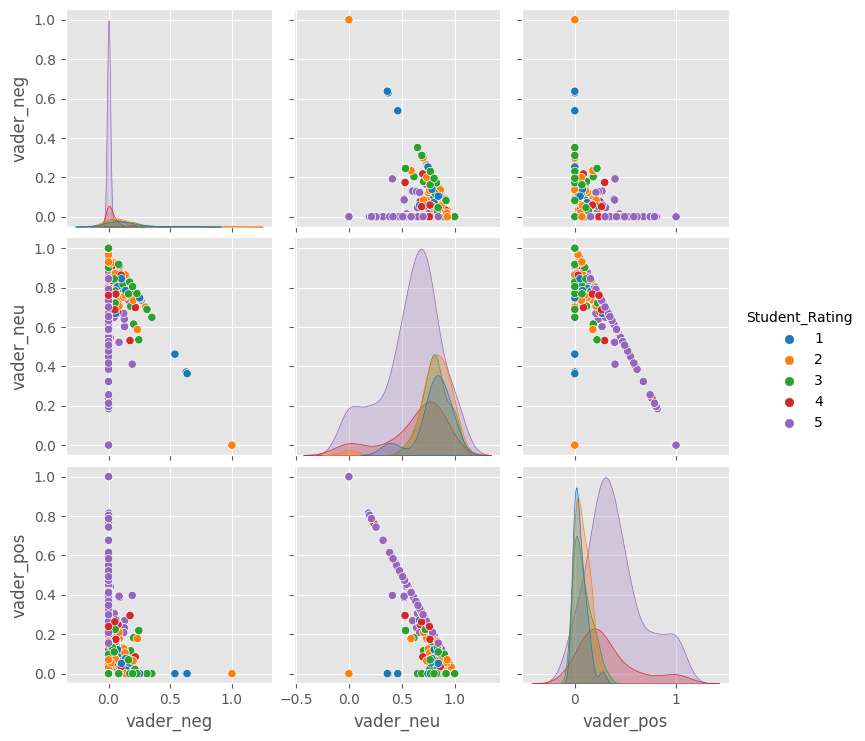

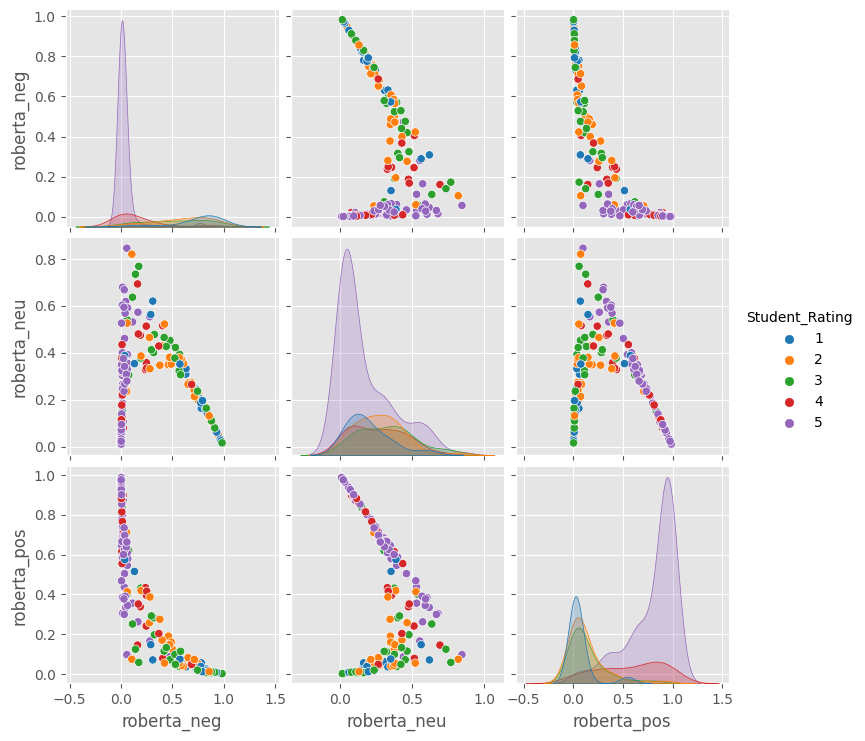

In [45]:

sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos'], hue='Student_Rating', palette='tab10')
sns.pairplot(data=results_df, vars=['roberta_neg', 'roberta_neu', 'roberta_pos'], hue='Student_Rating', palette='tab10')
plt.show()



In [46]:
roberta = pd.DataFrame(res).T
roberta = roberta.reset_index().rename(columns={'index': 'Id'})
roberta = roberta.merge(df, how='left')

# Now we have sentiment score and metadata
roberta.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Platform,Course_Name,Level,Duration_hours,Students_Enrolled,Student_Name,Reviews,Student_Rating,Overall_Rating
0,1,0.000,0.734,0.266,0.4404,0.002343,0.042444,0.955212,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Ekta R.,Its a good course to learn about the mentioned...,5,"4,4"
1,2,0.130,0.602,0.269,0.4588,0.473575,0.439946,0.086478,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Jakub B.,Good exercises but sometimes was a bug in answ...,5,"4,4"
2,3,0.000,0.408,0.592,0.6997,0.005317,0.063456,0.931227,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Natalia S.,Clear and concise. Very good instructor.,5,"4,4"
3,4,0.000,0.547,0.453,0.6997,0.003412,0.070925,0.925663,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Susan S.,This course was very clear and had good examples,5,"4,4"
4,5,0.052,0.824,0.124,0.8111,0.008184,0.059679,0.932137,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Enoch B.,"Datacamp, has a great learning format that all...",5,"4,4"


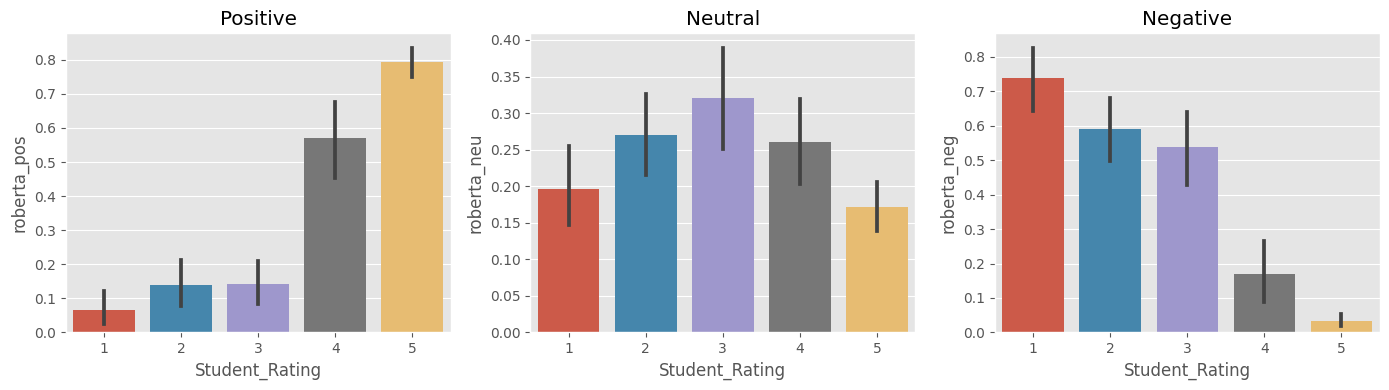

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
sns.barplot(data=roberta, x='Student_Rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=roberta, x='Student_Rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=roberta, x='Student_Rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [51]:
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={'index': 'Id'})
vader = vader.merge(df, how='left')

# Now we have sentiment score and metadata
vader.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Platform,Course_Name,Level,Duration_hours,Students_Enrolled,Student_Name,Reviews,Student_Rating,Overall_Rating
0,1,0.000,0.734,0.266,0.4404,0.002343,0.042444,0.955212,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Ekta R.,Its a good course to learn about the mentioned...,5,"4,4"
1,2,0.130,0.602,0.269,0.4588,0.473575,0.439946,0.086478,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Jakub B.,Good exercises but sometimes was a bug in answ...,5,"4,4"
2,3,0.000,0.408,0.592,0.6997,0.005317,0.063456,0.931227,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Natalia S.,Clear and concise. Very good instructor.,5,"4,4"
3,4,0.000,0.547,0.453,0.6997,0.003412,0.070925,0.925663,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Susan S.,This course was very clear and had good examples,5,"4,4"
4,5,0.052,0.824,0.124,0.8111,0.008184,0.059679,0.932137,DataCamp,Data Manipulation in SQL,Intermediate,4,172.696,Enoch B.,"Datacamp, has a great learning format that all...",5,"4,4"


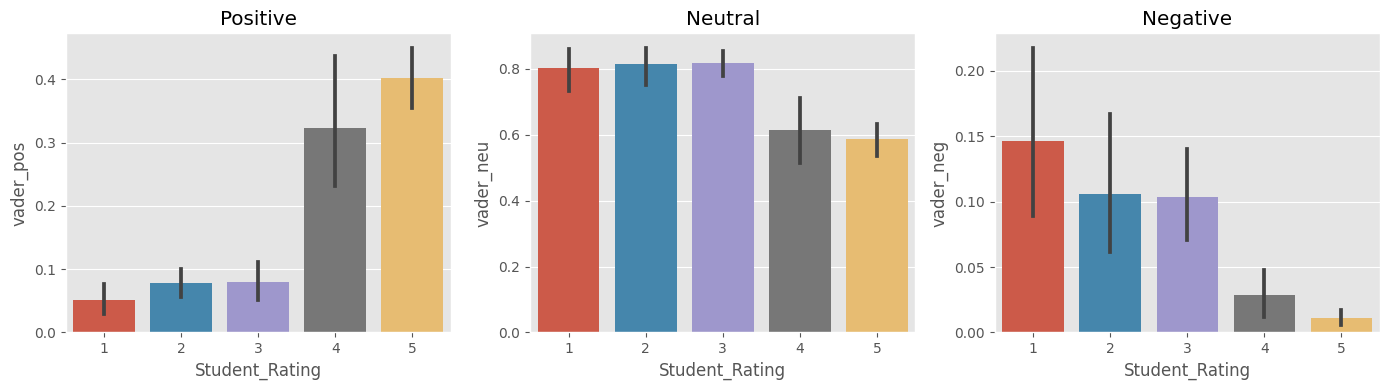

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
sns.barplot(data=vader, x='Student_Rating', y='vader_pos', ax=axs[0])
sns.barplot(data=vader, x='Student_Rating', y='vader_neu', ax=axs[1])
sns.barplot(data=vader, x='Student_Rating', y='vader_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

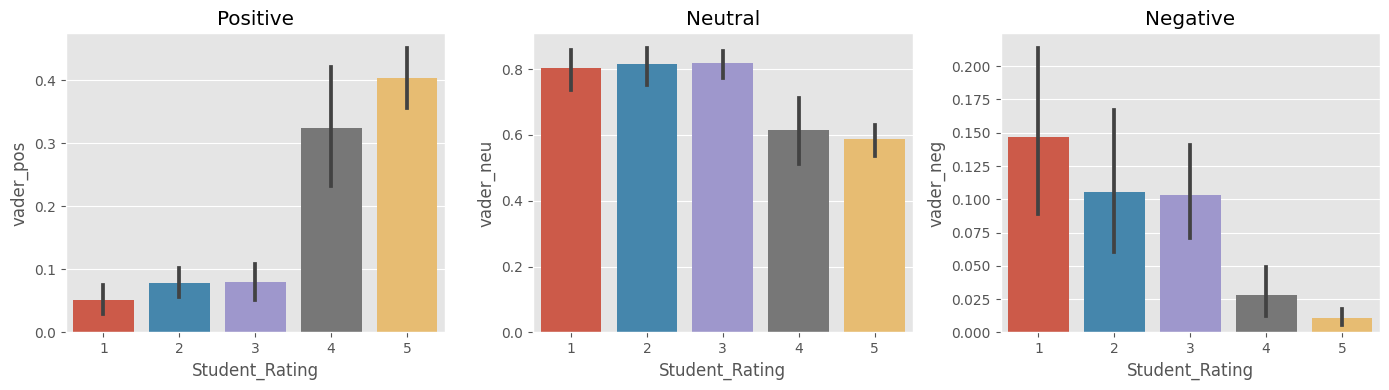

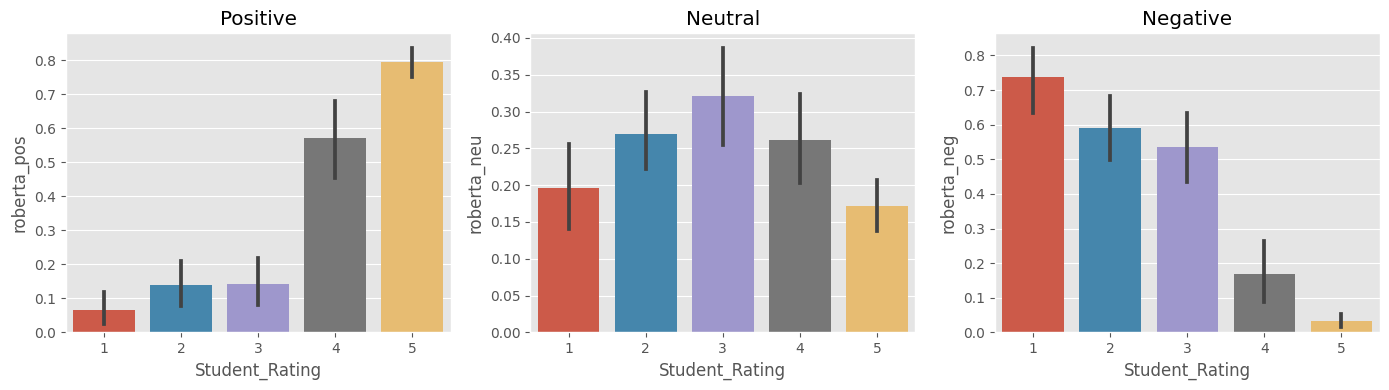

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
sns.barplot(data=vader, x='Student_Rating', y='vader_pos', ax=axs[0])
sns.barplot(data=vader, x='Student_Rating', y='vader_neu', ax=axs[1])
sns.barplot(data=vader, x='Student_Rating', y='vader_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
fig, axs = plt.subplots(1, 3, figsize=(14, 4))
sns.barplot(data=roberta, x='Student_Rating', y='roberta_pos', ax=axs[0])
sns.barplot(data=roberta, x='Student_Rating', y='roberta_neu', ax=axs[1])
sns.barplot(data=roberta, x='Student_Rating', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()